In [2]:
import pandas as pd
import seaborn as sns

In [3]:
parts = pd.read_pickle('pkl/parts.pkl')

In [4]:
parts['BMI'] = parts['wt_kg']/((parts['ht_cm']/100)**2)
parts

,disease,diag_dis,dom_hand,sex,wt_kg,ht_cm,eth_part,rac_part,moth_smk,BMI
BARCODE2,,,,,,,,,,
AC000003,MS,CASE,LEFT,MALE,90.718474,180.34,Non Hispanic or Latino,White,True,27.894052
AC000005,MS,CASE,RIGHT,FEMALE,93.440028,167.64,Non Hispanic or Latino,White,True,33.248929
AC000006,CONTROL,CONTROL,RIGHT,FEMALE,102.058283,162.56,Non Hispanic or Latino,White,False,38.620765
AC000007,CONTROL,CONTROL,LEFT,MALE,79.832257,179.07,Non Hispanic or Latino,White,True,24.896181
AC000009,TM,CASE,RIGHT,FEMALE,58.967008,166.37,Non Hispanic or Latino,White,False,21.303897
...,...,...,...,...,...,...,...,...,...,...
PC001059,CONTROL,CONTROL,RIGHT,MALE,27.215542,132.08,Non Hispanic or Latino,White,True,15.600656
PC001064,CONTROL,CONTROL,RIGHT,FEMALE,58.967008,162.56,Non Hispanic or Latino,White,True,22.314220
PC001065,CONTROL,CONTROL,RIGHT,FEMALE,48.987976,165.10,Non Hispanic or Latino,White,True,17.971956


In [5]:
outlier = parts.BMI.idxmax()
parts.drop(outlier, inplace = True)

<AxesSubplot:xlabel='BMI', ylabel='Density'>

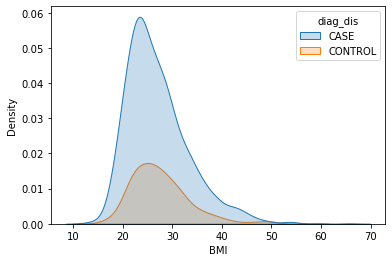

In [6]:
sns.kdeplot(data = parts, x = 'BMI', hue = 'diag_dis', shade = True)

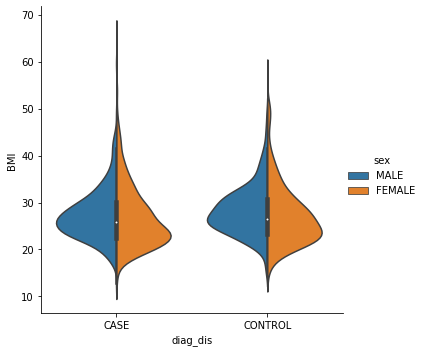

In [7]:
sns.catplot(data=parts, kind='violin', x='diag_dis', y = 'BMI', hue = 'sex', split = True)

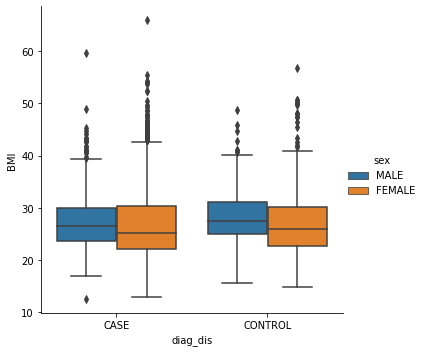

In [8]:
sns.catplot(data=parts, kind='box', x='diag_dis', y = 'BMI', hue = 'sex')

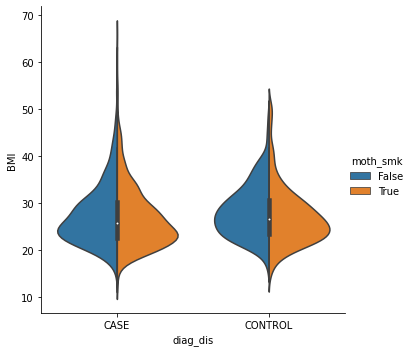

In [9]:
sns.catplot(data=parts, kind='violin', x='diag_dis', y = 'BMI', hue = 'moth_smk', split = True)

In [10]:
parts.diag_dis.value_counts()

CASE       2301
CONTROL     688
Name: diag_dis, dtype: int64

In [11]:
moth_smk_by_diag = parts.moth_smk.groupby(parts['diag_dis']).value_counts()
moth_smk_by_diag


diag_dis  moth_smk
CASE      True        1474
          False        541
CONTROL   True         433
          False        172
Name: moth_smk, dtype: int64

In [12]:
# sns.catplot(data=parts, kind = 'bar', x='diag_dis', y=, hue = 'moth_smk')
# sns.catplot(data=parts, kind = 'bar', x=moth_smk_by_diag.index, y = moth_smk_by_diag, hue = 'moth_smk')

<AxesSubplot:xlabel='diag_dis'>

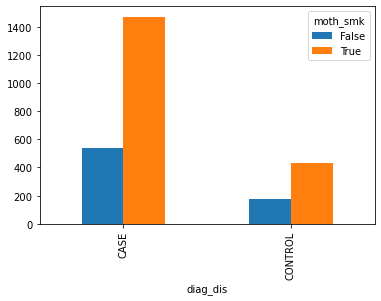

In [13]:
moth_smk_by_diag.unstack().plot(kind='bar')

#### Citation for data.unstack().plot(kind='bar'): https://stackoverflow.com/questions/34248741/plotting-pandas-multiindex-bar-chart

In [16]:
unstacked = moth_smk_by_diag.unstack()
unstacked

moth_smk,False,True
diag_dis,,
CASE,541,1474
CONTROL,172,433


In [18]:
newparts = parts.copy()

In [19]:
newparts

,disease,diag_dis,dom_hand,sex,wt_kg,ht_cm,eth_part,rac_part,moth_smk,BMI
BARCODE2,,,,,,,,,,
AC000003,MS,CASE,LEFT,MALE,90.718474,180.34,Non Hispanic or Latino,White,True,27.894052
AC000005,MS,CASE,RIGHT,FEMALE,93.440028,167.64,Non Hispanic or Latino,White,True,33.248929
AC000006,CONTROL,CONTROL,RIGHT,FEMALE,102.058283,162.56,Non Hispanic or Latino,White,False,38.620765
AC000007,CONTROL,CONTROL,LEFT,MALE,79.832257,179.07,Non Hispanic or Latino,White,True,24.896181
AC000009,TM,CASE,RIGHT,FEMALE,58.967008,166.37,Non Hispanic or Latino,White,False,21.303897
...,...,...,...,...,...,...,...,...,...,...
PC001059,CONTROL,CONTROL,RIGHT,MALE,27.215542,132.08,Non Hispanic or Latino,White,True,15.600656
PC001064,CONTROL,CONTROL,RIGHT,FEMALE,58.967008,162.56,Non Hispanic or Latino,White,True,22.314220
PC001065,CONTROL,CONTROL,RIGHT,FEMALE,48.987976,165.10,Non Hispanic or Latino,White,True,17.971956


In [20]:
pieparts = newparts.drop(["disease", "dom_hand", "sex", "wt_kg", "ht_cm", "eth_part", "rac_part", "BMI"], axis = 1)
pieparts

,diag_dis,moth_smk
BARCODE2,,
AC000003,CASE,True
AC000005,CASE,True
AC000006,CONTROL,False
AC000007,CONTROL,True
AC000009,CASE,False
...,...,...
PC001059,CONTROL,True
PC001064,CONTROL,True
PC001065,CONTROL,True


In [21]:
pieparts.moth_smk.replace({True: 1, False: 0})

BARCODE2
AC000003    1.0
AC000005    1.0
AC000006    0.0
AC000007    1.0
AC000009    0.0
           ... 
PC001059    1.0
PC001064    1.0
PC001065    1.0
PC001069    1.0
PC001070    1.0
Name: moth_smk, Length: 2991, dtype: float64

In [22]:
case = pieparts.loc[parts.diag_dis == "CASE"]
case

,diag_dis,moth_smk
BARCODE2,,
AC000003,CASE,True
AC000005,CASE,True
AC000009,CASE,False
AC000011,CASE,True
AC000013,CASE,True
...,...,...
PC001032,CASE,False
PC001037,CASE,True
PC001038,CASE,True


In [35]:
casegroup = case.groupby("moth_smk").moth_smk.count()
casegroup

moth_smk
False     541
True     1474
Name: moth_smk, dtype: int64

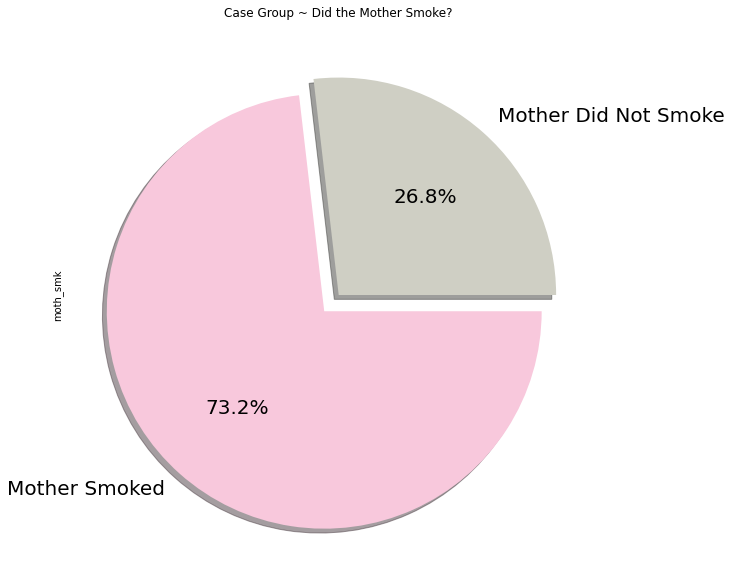

In [50]:
labels = ['Mother Did Not Smoke', 'Mother Smoked']
explode = (0, 0.1)
colors = ['#cfcfc4','#F8C8DC']
caseplot = casegroup.plot.pie(title = "Case Group ~ Did the Mother Smoke?", y='casegroup', figsize=(10, 10),autopct='%1.1f%%', labels = labels, explode = explode, shadow = True, colors = colors, fontsize=20)


In [29]:
control = pieparts.loc[parts.diag_dis == "CONTROL"]
control

,diag_dis,moth_smk
BARCODE2,,
AC000006,CONTROL,False
AC000007,CONTROL,True
AC000010,CONTROL,False
AC000012,CONTROL,True
AC000022,CONTROL,True
...,...,...
PC001059,CONTROL,True
PC001064,CONTROL,True
PC001065,CONTROL,True


In [32]:
controlgroup = control.groupby("moth_smk").moth_smk.count()
controlgroup

moth_smk
False    172
True     433
Name: moth_smk, dtype: int64

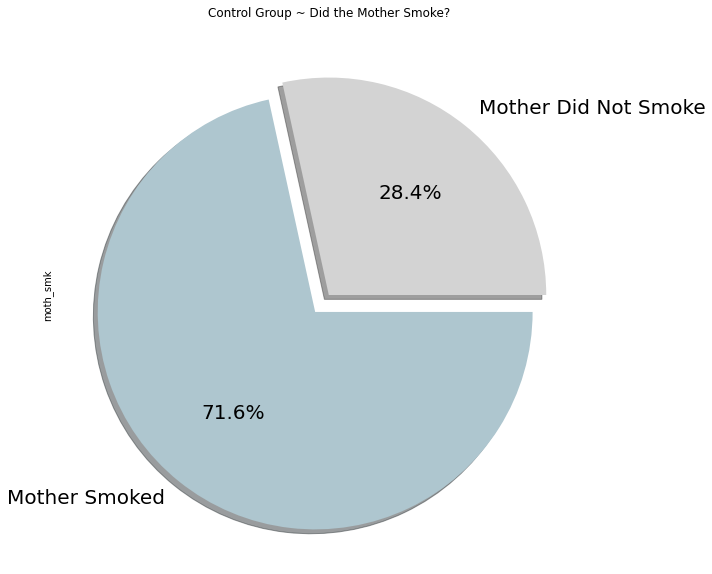

In [49]:
labels = ['Mother Did Not Smoke', 'Mother Smoked']
explode = (0, 0.1)
colors = colors = ['#D3D3D3','#AEC6CF']

controlplot = controlgroup.plot.pie(title = "Control Group ~ Did the Mother Smoke?", y='controlgroup', figsize=(10, 10),autopct='%1.1f%%',labels = labels, explode = explode, shadow = True, colors = colors,fontsize=20)



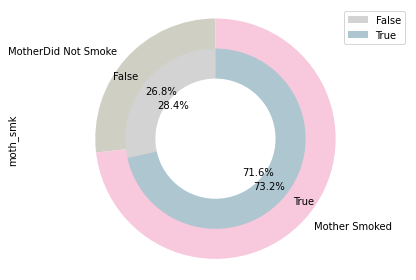

In [66]:
import matplotlib.pyplot as plt
labels = ['MotherDid Not Smoke', 'Mother Smoked']
#labels_control = ['Yes','No']
colors = ['#cfcfc4','#F8C8DC']
colors_inside = ['#D3D3D3','#AEC6CF']
 
# Plot
casegroup.plot.pie(labels=labels, colors=colors, startangle=90,frame=True, autopct='%1.1f%%',fontsize=10)
controlgroup.plot.pie(colors=colors_inside,radius=0.75,startangle=90, autopct='%1.1f%%', legend = True)
centre_circle = plt.Circle((0,0),0.5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
 
plt.axis('equal')
plt.tight_layout()
plt.show()

#https://medium.com/@kvnamipara/a-better-visualisation-of-pie-charts-by-matplotlib-935b7667d77f